In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [3]:
star = pd.read_csv('pulsar_stars.csv')
star.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [4]:
star.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [7]:
# data is very clean, as expected from a kaggle dataset

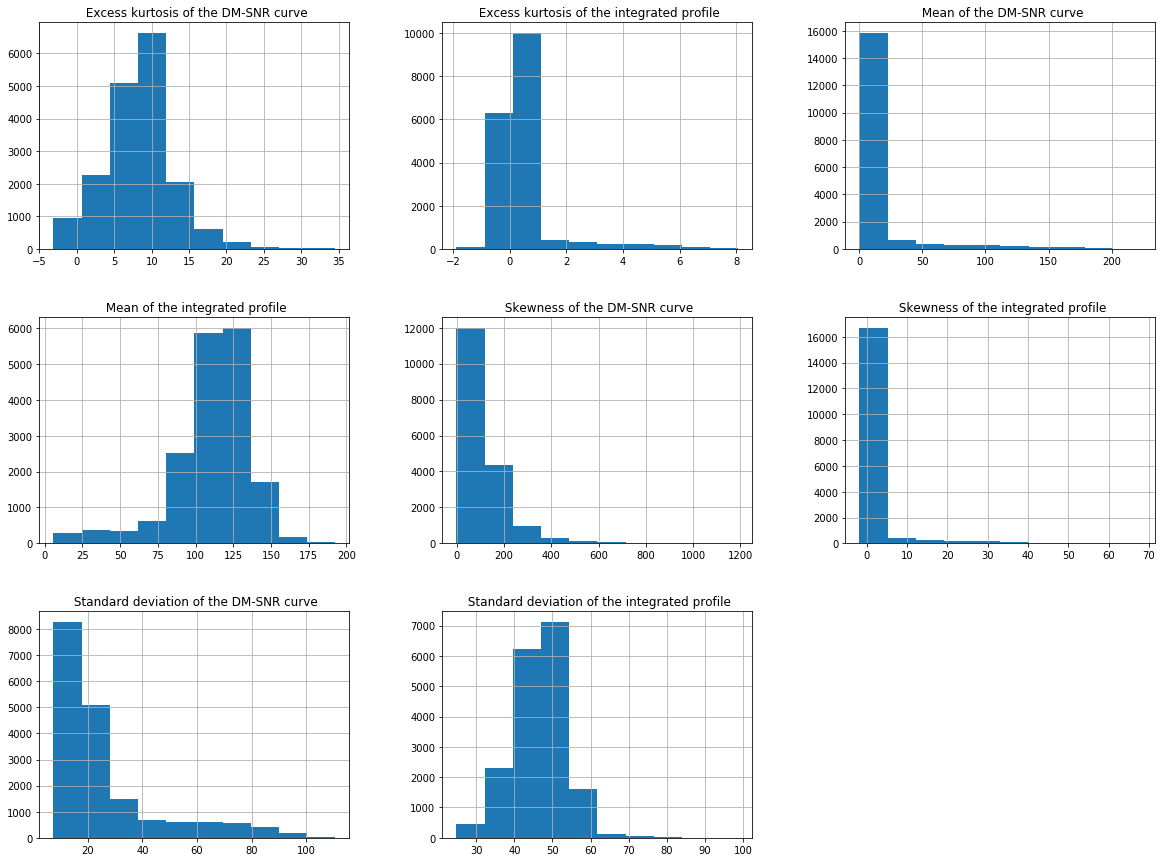

In [5]:
star.iloc[:,:8].hist(figsize=(20,15))
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score

star = shuffle(star)
x = star.iloc[:,:8]
y = star['target_class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=120)

In [8]:
model = SVC(gamma='scale')
modelfit = model.fit(X_train,y_train)

In [15]:
predictions = modelfit.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))


NameError: name 'modelfit' is not defined

In [54]:
#The important measurement is recall (.75 for this algorithm).  This means we correctly identified 75% of pulars.  As an astronomer, we want to be able to have this algorithm capture as many pulsars as possible.  Therefore, I will tune the hyperparameters as well as set the scoring to 'recall'
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform as sp_rand
params = param_grid = [{'C': [100, 1000, 10000, 100000], 'gamma': [0.001, 0.0001, 0.00001], 'kernel': ['rbf']}]
clf = GridSearchCV(SVC(),params,cv=5,scoring='recall')

In [55]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [100, 1000, 10000, 100000], 'gamma': [0.001, 0.0001, 1e-05], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [56]:
clf.best_params_

{'C': 100000, 'gamma': 1e-05, 'kernel': 'rbf'}

In [57]:
bestpredictions = clf.predict(X_test)

In [58]:
print(confusion_matrix(y_test,bestpredictions))
print('\n')
print(classification_report(y_test,bestpredictions))
# recall of 0.82

[[6452   32]
 [ 122  554]]


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6484
           1       0.95      0.82      0.88       676

   micro avg       0.98      0.98      0.98      7160
   macro avg       0.96      0.91      0.93      7160
weighted avg       0.98      0.98      0.98      7160



In [24]:
#The reason this is still so off is because the data is heavily unbalance with over 90% of the stars not being pulsars
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score

star = shuffle(star)
x2 = star.iloc[:,:8]
y2 = star['target_class']
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.4, random_state=125)
class_weight = {0: star[star['target_class']==1].shape[0]/star.shape[0], 1: star[star['target_class']==0].shape[0]/star.shape[0]}
class_weight

{0: 0.09157447759526204, 1: 0.908425522404738}

In [25]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform as sp_rand
params = param_grid = [{'C': [100, 1000, 10000, 100000], 'gamma': [0.001, 0.0001, 0.00001], 'kernel': ['rbf']}]
clf = GridSearchCV(SVC(class_weight=class_weight),params,cv=5,scoring='recall')

In [26]:
clf.fit(X2_train,y2_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200,
  class_weight={0: 0.09157447759526204, 1: 0.908425522404738}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [100, 1000, 10000, 100000], 'gamma': [0.001, 0.0001, 1e-05], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [27]:
clf.best_params_

{'C': 100000, 'gamma': 1e-05, 'kernel': 'rbf'}

In [28]:
bestpredictions = clf.predict(X2_test)

In [29]:

from sklearn.metrics import classification_report,confusion_matrix


print(confusion_matrix(y2_test,bestpredictions))
print('\n')
print(classification_report(y2_test,bestpredictions))
#94% recall is much better

[[6369  147]
 [  39  605]]


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      6516
           1       0.80      0.94      0.87       644

   micro avg       0.97      0.97      0.97      7160
   macro avg       0.90      0.96      0.93      7160
weighted avg       0.98      0.97      0.97      7160

